In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("state_weather_aqi_data_mf2.csv")
df.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",3/1/2020,10:00:00,68,64,17,4,28,31,40,68
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",3/1/2020,10:00:00,67,70,23,2,13,49,77,77
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",3/1/2020,10:00:00,32,64,26,5,6,19,16,32
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",3/1/2020,10:00:00,93,93,31,3,9,57,61,93
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",5/1/2020,6:00:00,60,55,20,5,18,29,53,60


In [3]:
df.size

20345

In [4]:
def rmsle(real, predicted):
    # Convert inputs to numpy arrays for index-based access
    real = np.array(real)
    predicted = np.array(predicted)
    
    squared_log_sum = 0.0
    for i in range(len(predicted)):
        if predicted[i] < 0 or real[i] < 0:
            continue
        log_pred = np.log(predicted[i] + 1)
        log_real = np.log(real[i] + 1)
        squared_log_sum += (log_pred - log_real) ** 2

    rmsle_value = (squared_log_sum / len(predicted)) ** 0.5
    return rmsle_value


In [5]:
x1 = df.iloc[:,:12].values
y1 = df.iloc[:,12].values


ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station


feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)

x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)



In [6]:
x_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
      ...   
2     object
3     object
4     object
5     object
6     object
Length: 334, dtype: object

### Multiple linear regression model

In [7]:
mreg = LinearRegression()
mreg.fit(x_train,y_train)

mlr_y_predict = mreg.predict(x_test)

##### MLR Test data results:

In [8]:
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

print(f"Error Metrics for Test data (MLR):\n rmse_mlr: {rmse_mlr} \n mae_mlr: {mae_mlr}\n r2_mlr: {r2_mlr}\n rmsle_mlr: {rmsle_mlr}")

Error Metrics for Test data (MLR):
 rmse_mlr: 5.497629774961925 
 mae_mlr: 3.479767654395225
 r2_mlr: 0.9965381964519129
 rmsle_mlr: 0.0517987068197834


### polynomial regression model
degree = 2

In [9]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

##### PR Test data results:

In [10]:

rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

print(f"Error Metrics for Test data (PR):\n rmse_pr: {rmse_pr} \n mae_pr: {mae_pr}\n r2_pr: {r2_pr}\n rmsle_pr: {rmsle_pr}")

Error Metrics for Test data (PR):
 rmse_pr: 211.87582280036742 
 mae_pr: 81.58549770345256
 r2_pr: -4.141788907334089
 rmsle_pr: 0.4638973248294181


### Decision Tree regression model

In [11]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

##### Decision Tree Test data results:

In [12]:
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n mae_dt: {mae_dt}\n r2_dt: {r2_dt}\n rmsle_dt: {rmsle_dt}")

Error Metrics for Test data (DT):
 rmse_dt: 6.237027353161251 
 mae_dt: 2.354591836734694
 r2_dt: 0.9955443944501944
 rmsle_dt: 0.056314398388602166


### RFR regression model

In [13]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)

rt_y_predict = rt_reg.predict(x_test)

##### RFR Test data results:

In [14]:
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

print(f"Error Metrics for Test data:\n rmse_rt: {rmse_rt} \n mae_rt: {mae_rt}\n r2_rt: {r2_rt}\n rmsle_rt: {rmsle_rt}")

Error Metrics for Test data:
 rmse_rt: 3.857722119201899 
 mae_rt: 1.7016479591836735
 r2_rt: 0.9982954359639727
 rmsle_rt: 0.042296296173332346


### SVR regression model

In [15]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
y_train_svr = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)).reshape(1,-1))

##### SVR Test data results:

In [16]:
rmse_svr = sqrt(metrics.mean_squared_error(y_test, svr_y_predict.T))
mae_svr = metrics.mean_absolute_error(y_test, svr_y_predict.T)
r2_svr = metrics.r2_score(y_test,svr_y_predict.T)
rmsle_svr = rmsle(y_test,svr_y_predict.T)

print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

Error Metrics for Test data:
 rmse_svr: 27.00259452422349 
 mae_svr: 19.072271430610257
 r2_svr: 0.9164853954796426
 rmsle_svr: [0.16860095]


CATBOOST

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
import numpy as np

In [18]:

# Load data (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv("state_weather_aqi_data_mf2.csv")


# Drop original date and time columns if not needed
data = data.drop(['date', 'time','state', 'city', 'station'], axis=1)

# Convert categorical columns using one-hot encoding

# Define features and target variable
X_xgb = data.drop('AQI', axis=1)
y_xgb = data['AQI']

# Split data into training and test sets
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
model = XGBRegressor()
model.fit(xgb_X_train, xgb_y_train)

# Predict and evaluate the model
xgb_y_predict = model.predict(xgb_X_test)

print(len(xgb_y_predict))
rmse_xgb = np.sqrt(mean_squared_error(xgb_y_test, xgb_y_predict))
mae_xgb = mean_absolute_error(xgb_y_test, xgb_y_predict)
r2_xgb = r2_score(xgb_y_test, xgb_y_predict)
rmsle_xgb = rmsle(xgb_y_test, xgb_y_predict)



print(f"Error Metrics for Test data:\n rmse_xgb: {rmse_xgb} \n mae_xgb: {mae_xgb}\n r2_xgb {r2_xgb}\n rmsle_xgb {rmsle_xgb}")


313
Error Metrics for Test data:
 rmse_xgb: 4.65929729088836 
 mae_xgb: 2.4404753602731724
 r2_xgb 0.9976975196476453
 rmsle_xgb 0.03975166246570753


In [19]:
print(xgb_X_test)
print(xgb_y_test)

      PM2.5  PM10  NO2  NH3  SO2  CO  OZONE
527     267   125    8    5    5  16     26
271     324   239   84    9    8  55     29
1402    150   187   95   17   11  24      1
1201     59    42   15    2   10  10     34
59      327   150   30    9   23  68     40
...     ...   ...  ...  ...  ...  ..    ...
208     378   268   57   19   20  46     26
970     166   146   59    7   13  71     11
1113     87   100   51   12   17  57     42
483     158   113   25    3   20  29     11
58      122   150    9    9   18  54     29

[313 rows x 7 columns]
527     267
271     324
1402    187
1201     59
59      327
       ... 
208     378
970     166
1113    100
483     158
58      122
Name: AQI, Length: 313, dtype: int64


In [20]:
custom_input = np.array([[267, 125, 8, 5, 5, 16, 26]])  # Replace with actual feature array
custom_prediction = model.predict(custom_input)
print(f"Prediction for custom input: {custom_prediction[0]}")

Prediction for custom input: 263.87353515625


XGBOOST

In [21]:
import pickle
with open('xgbmode_pickle','wb') as f:
    pickle.dump(model,f)

    

In [22]:
with open('xgbmode_pickle','rb') as f:
    mp =pickle.load(f)

In [23]:
mp.predict(custom_input)

array([263.87354], dtype=float32)

In [24]:
print("evaluating on testing data:")
print("----------------------------------------")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))
print("SVR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_svr,rmse_svr,mae_svr,rmsle_svr[0]))
print("XGB\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_xgb,rmse_xgb,mae_xgb,rmsle_xgb))

evaluating on testing data:
----------------------------------------
models	R^2	RMSE	MAE	RMSLE
MLR	0.9965	5.4976	3.4798	0.0518
PR	-4.14	211.88	81.585	0.4639
DTR	0.9955	6.2370	2.3546	0.0563
RFR	0.9983	3.8577	1.7016	0.0423
SVR	0.9165	27.0026	19.0723	0.1686
XGB	0.9977	4.6593	2.4405	0.0398


## Plotting Actual vs Predicted AQI

In [25]:
import matplotlib.pyplot as plt

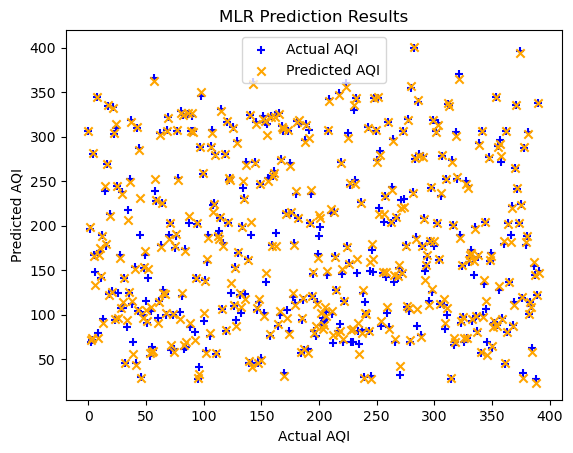

In [26]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(mlr_y_predict)), mlr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('MLR Prediction Results')
plt.legend()
plt.show()

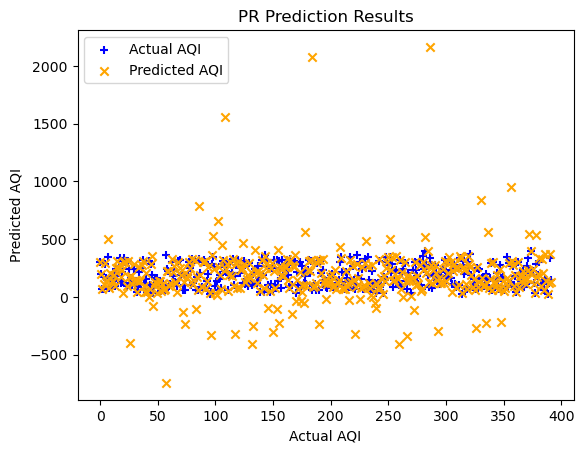

In [27]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(pr_y_predict)), pr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('PR Prediction Results')
plt.legend()
plt.show()

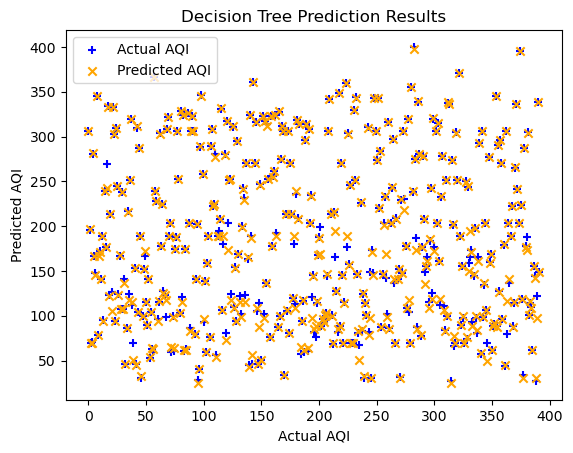

In [28]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(dt_y_predict)), dt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()

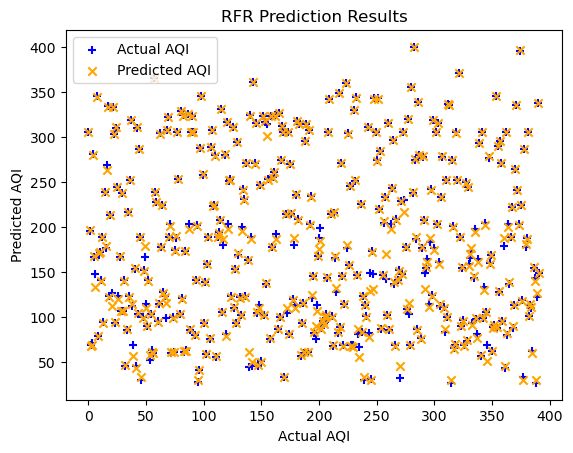

In [29]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(rt_y_predict)), rt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results')
plt.legend()
plt.show()

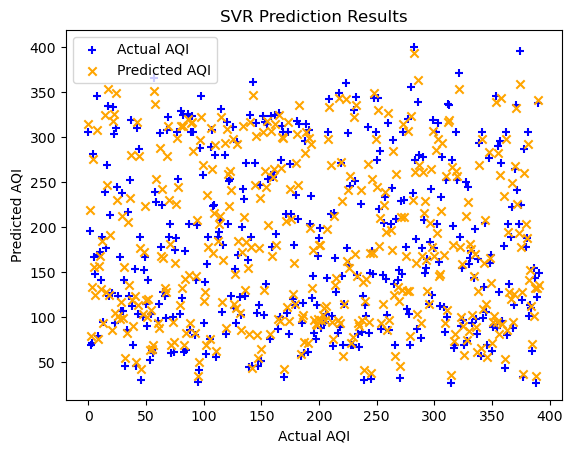

In [30]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(svr_y_predict.T)), svr_y_predict.T, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results')
plt.legend()
plt.show()

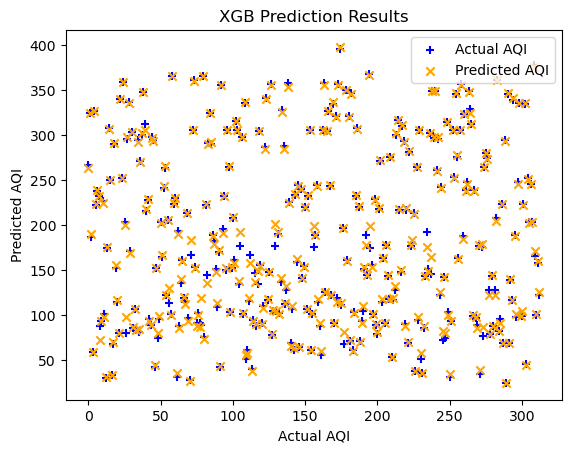

In [31]:
plt.scatter(range(len(xgb_y_test)), xgb_y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(xgb_y_predict)), xgb_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('XGB Prediction Results')
plt.legend()
plt.show()

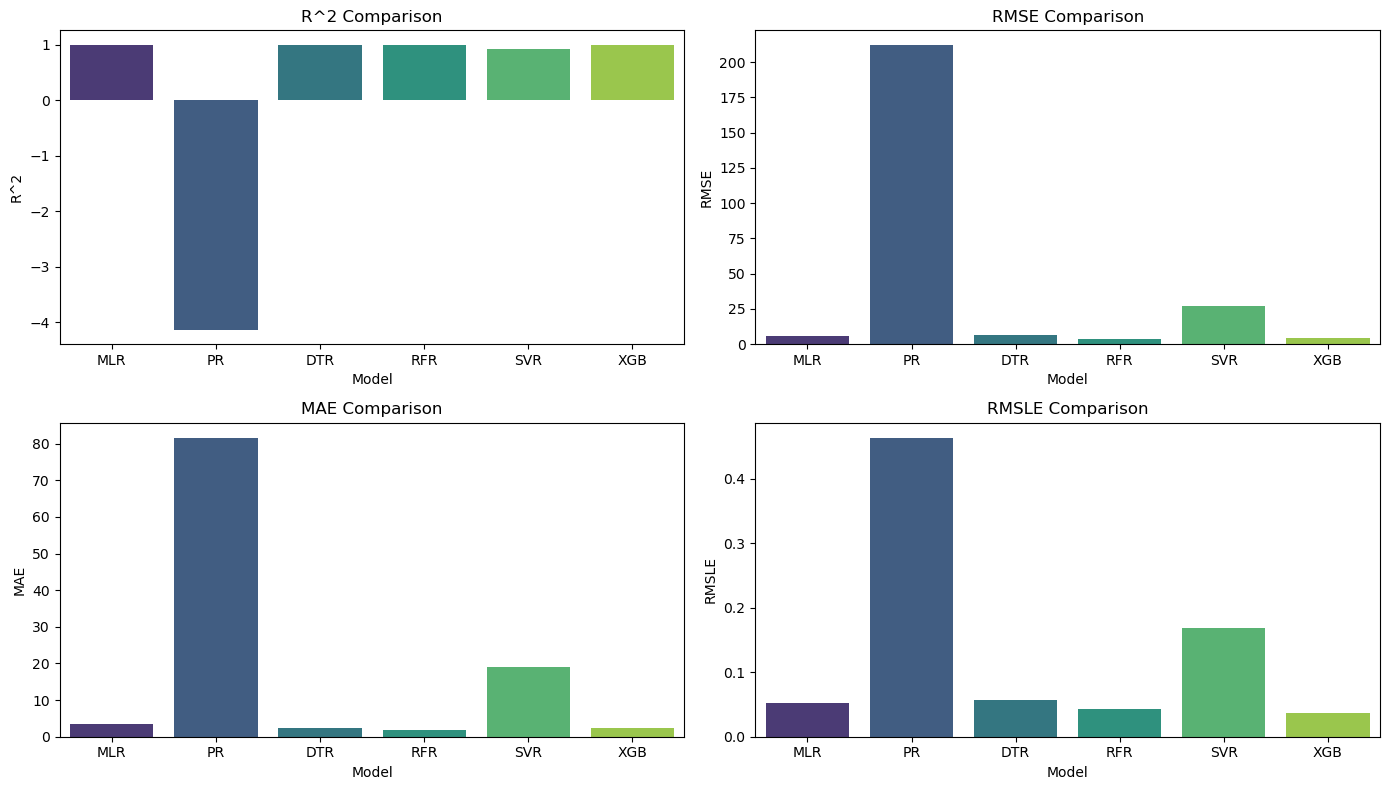

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for each model and their corresponding evaluation metrics
data = {
    "Model": ["MLR", "PR", "DTR", "RFR", "SVR", "XGB"],
    "R^2": [0.9965, -4.14, 0.9955, 0.9983, 0.9165, 0.9979],
    "RMSE": [5.4976, 211.88, 6.2370, 3.8577, 27.0026, 4.4477],
    "MAE": [3.4798, 81.585, 2.3546, 1.7016, 19.0723, 2.3389],
    "RMSLE": [0.0518, 0.4639, 0.0563, 0.0423, 0.1686, 0.0363]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot each metric in a subplot
metrics = ["R^2", "RMSE", "MAE", "RMSLE"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x="Model", y=metric, data=df, palette='viridis')
    plt.title(f"{metric} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
 

plt.tight_layout()

plt.show()


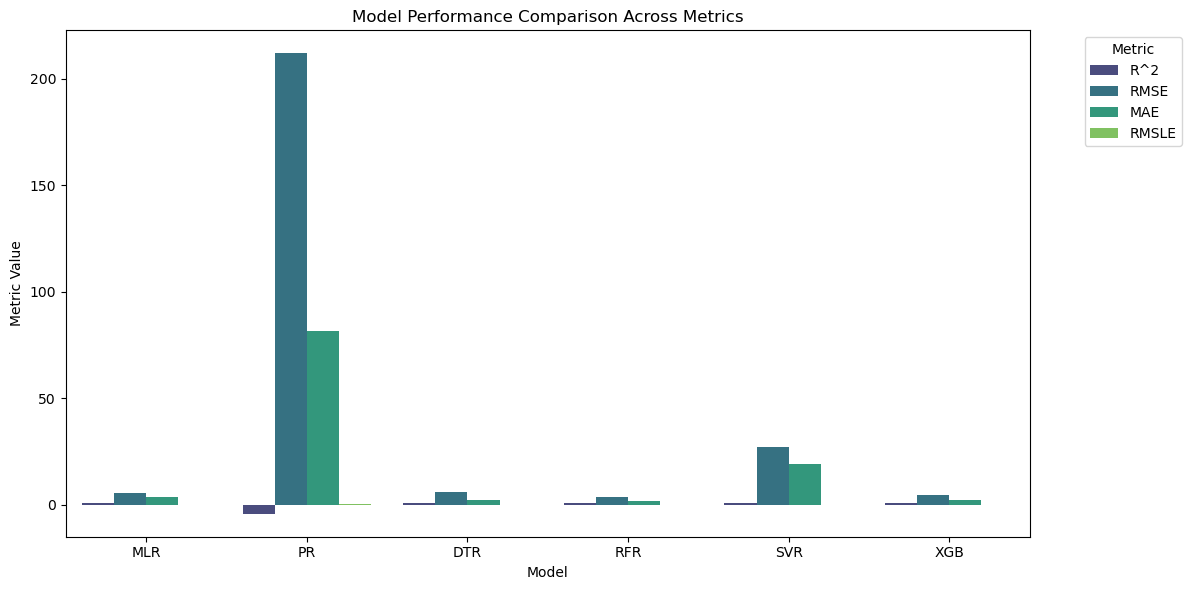

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for each model and their corresponding evaluation metrics
data = {
    "Model": ["MLR", "PR", "DTR", "RFR", "SVR", "XGB"],
    "R^2": [0.9965, -4.14, 0.9955, 0.9983, 0.9165, 0.9979],
    "RMSE": [5.4976, 211.88, 6.2370, 3.8577, 27.0026, 4.4477],
    "MAE": [3.4798, 81.585, 2.3546, 1.7016, 19.0723, 2.3389],
    "RMSLE": [0.0518, 0.4639, 0.0563, 0.0423, 0.1686, 0.0363]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
sns.barplot(x="Model", y="Value", hue="Metric", data=df_melted, palette="viridis")

# Add plot title and labels
plt.title("Model Performance Comparison Across Metrics")
plt.xlabel("Model")
plt.ylabel("Metric Value")

# Adjust legend position
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
data = {
    "Model": ["MLR", "PR", "DTR", "RFR", "SVR", "XGB"],
    "R^2": [0.9965, -4.14, 0.9955, 0.9983, 0.9165, 0.9979],
    "RMSE": [5.4976, 211.88, 6.2370, 3.8577, 27.0026, 4.4477],
    "MAE": [3.4798, 81.585, 2.3546, 1.7016, 19.0723, 2.3389],
    "RMSLE": [0.0518, 0.4639, 0.0563, 0.0423, 0.1686, 0.0363]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)
df

,Model,R^2,RMSE,MAE,RMSLE
0,MLR,0.9965,5.4976,3.4798,0.0518
1,PR,-4.1400,211.8800,81.5850,0.4639
2,DTR,0.9955,6.2370,2.3546,0.0563
3,RFR,0.9983,3.8577,1.7016,0.0423
4,SVR,0.9165,27.0026,19.0723,0.1686
5,XGB,0.9979,4.4477,2.3389,0.0363
